In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from scipy.ndimage import median_filter

In [2]:
def thresholding(image, threshold):
    # This function takes an image and a threshold value as input.
    # Returns the binary image where a pixel is 1 if all RGB channels of input image is larger than the threshold.
    # Otherwise the pixels becomes zero.
    
    image_thr = np.logical_and( (image[:,:,0] > threshold) , (image[:,:,1] > threshold) )
    image_thr = np.logical_and( image_thr , (image[:,:,2] > threshold) )
    
    return image_thr.astype(int)

In [3]:
def is_in_the_image(y,x,h,w):
    # This function checks if given coordinates (y,x) lies 
    # withing a frame size (h,w)
    
    return (y>=0) and (y<=h-1) and (x>=0) and (x<=w-1)    

In [4]:
def connected_component_analysis(image):
    # This function finds the number of connected components in a given binary image.
    # It also returns an image that shows the connected components with different colors.
    
    h, w = image.shape[0], image.shape[1] # Find the image height and width
    
    current_label = 1
    qq = []
    
    pixel_labels = np.zeros((h,w))
    
    for y in range(h):
        for x in range(w):
            
            if (image[y,x] == 0) and (pixel_labels[y,x] == 0):
                pixel_labels[y,x] = current_label
                qq.append((y,x))
                
                for q in qq: # Check for each element in the queque
                    q_y, q_x = q[0], q[1] # Coordinates of the current queque element
                    
                    # Check all 8 pixels surrounding the current one:
                    if is_in_the_image(q_y-1,q_x-1,h,w):
                        if (image[q_y-1,q_x-1] == 0) and (pixel_labels[q_y-1,q_x-1] == 0):
                            pixel_labels[q_y-1,q_x-1] = current_label
                            qq.append((q_y-1,q_x-1))
                        
                    if is_in_the_image(q_y-1,q_x,h,w):
                        if (image[q_y-1,q_x] == 0) and (pixel_labels[q_y-1,q_x] == 0):
                            pixel_labels[q_y-1,q_x] = current_label
                            qq.append((q_y-1,q_x))
                        
                    if is_in_the_image(q_y-1,q_x+1,h,w):
                        if (image[q_y-1,q_x+1] == 0) and (pixel_labels[q_y-1,q_x+1] == 0):
                            pixel_labels[q_y-1,q_x+1] = current_label
                            qq.append((q_y-1,q_x+1))
                        
                    if is_in_the_image(q_y,q_x-1,h,w):
                        if (image[q_y,q_x-1] == 0) and (pixel_labels[q_y,q_x-1] == 0):
                            pixel_labels[q_y,q_x-1] = current_label
                            qq.append((q_y,q_x-1))
                        
                    if is_in_the_image(q_y-1,q_x+1,h,w):
                        if (image[q_y-1,q_x+1] == 0) and (pixel_labels[q_y-1,q_x+1] == 0):
                            pixel_labels[q_y-1,q_x+1] = current_label
                            qq.append((q_y-1,q_x+1))
                        
                    if is_in_the_image(q_y+1,q_x-1,h,w):
                        if (image[q_y+1,q_x-1] == 0) and (pixel_labels[q_y+1,q_x-1] == 0):
                            pixel_labels[q_y+1,q_x-1] = current_label
                            qq.append((q_y+1,q_x-1))
                        
                    if is_in_the_image(q_y+1,q_x,h,w):
                        if (image[q_y+1,q_x] == 0) and (pixel_labels[q_y+1,q_x] == 0):
                            pixel_labels[q_y+1,q_x] = current_label
                            qq.append((q_y+1,q_x))
                        
                    if is_in_the_image(q_y+1,q_x+1,h,w):
                        if (image[q_y+1,q_x+1] == 0) and (pixel_labels[q_y+1,q_x+1] == 0):
                            pixel_labels[q_y+1,q_x+1] = current_label
                            qq.append((q_y+1,q_x+1))
                    
                current_label += 1
                qq = []
    return pixel_labels

In [5]:
def label2RGB(image):
    color_count = int(np.max(image))
    rgb_image = np.ones((image.shape[0], image.shape[1], 3))*255
    colors = np.random.randint(0, 255, size=(color_count, 3))
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j] != 0:
                rgb_image[i,j,:] = colors[int(image[i,j]-1),:]
        
    return rgb_image.astype(int)

The shape of image read is (139, 168, 3)


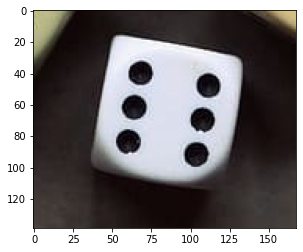

In [6]:
# Read the original image and display it along with its size:
directory = 'C:/Users/oguzh/Desktop/Graduate_Courses/CMPE 537 Computer Vision/HW1/'
image_org = plt.imread(directory+'dice6_2.png')
if image_org.shape[2] == 4: # If we read RGBA image, convert it to RGB
    image_org = image_org[:,:,0:3]*255
    image_org = image_org.astype(int)
    
print('The shape of image read is {}'.format(image_org.shape))
plt.imshow(image_org)

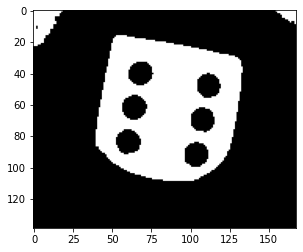

In [7]:
# Set the threshold and call color thresholding function:
threshold = 120
image = thresholding(image_org, threshold)

# Plot the resulting image after thresholding:
plt.imshow(image, cmap=plt.cm.gray)

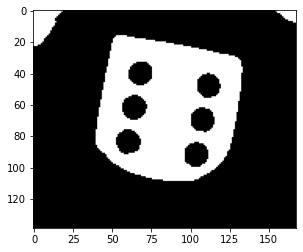

In [137]:
# Apply median filter to get rid of salt pepper noise:
image = median_filter(image, size=3)

# Plot the resulting image after median filter:
plt.imshow(image, cmap=plt.cm.gray)

The image has 7 distant components other than background


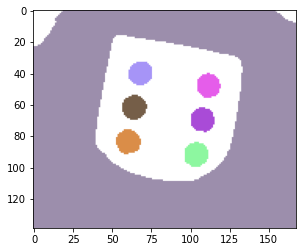

In [140]:
# Apply Connected Component Analysis:
pixel_labels = connected_component_analysis(image)

# Print the number of distant components:
print('The image has {} distant components other than background'.format(int(np.max(pixel_labels))))

# Print the labeled image:
plt.imshow(label2RGB(pixel_labels))